## Q2 LDA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

(2, 100) (2, 100)


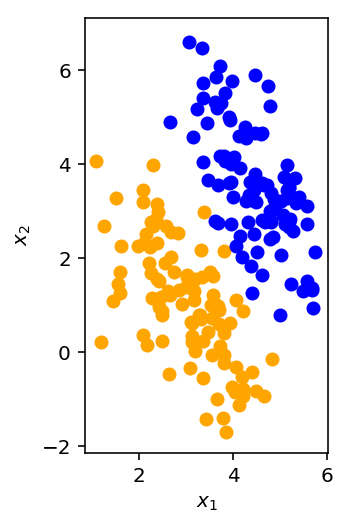

In [2]:
# Load the data and visualize.
Xs = np.load('lda.npy')

X_0 = np.matrix(Xs[:, 0:2]).T  # Shape: (2, 100).
X_1 = np.matrix(Xs[:, 2:4]).T  # Shape: (2, 100).

print(X_0.shape, X_1.shape)
plt.scatter(X_0[0].tolist(), X_0[1].tolist(), color='orange')
plt.scatter(X_1[0].tolist(), X_1[1].tolist(), color='blue')
plt.axis('scaled')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [3]:
# (a) Compute mean of each class.
mu_0 = np.matrix([[X_0[0,:].mean()], [X_0[1,:].mean()]])# Shape: (2, 1).
mu_1 = np.matrix([[X_1[0,:].mean()], [X_1[1,:].mean()]])# Shape: (2, 1).
mu_0 = mu_0.reshape(2,1)
mu_1 = mu_1.reshape(2,1)
print(mu_0.shape, mu_1.shape)
print('mu_0=\n{},\nmu_1=\n{}'.format(mu_0, mu_1))

print(mu_0*len(X_0))
A = np.matrix([[0,0,1],[0,0,1]])

(2, 1) (2, 1)
mu_0=
[[2.98351552]
 [1.06453902]],
mu_1=
[[4.46952033]
 [3.52885988]]
[[5.96703103]
 [2.12907804]]


In [4]:
# (b) Compute the covariance matrix for each class, Sigma_0 and Sigma_1.
Sigma_0 = (X_0 - mu_0).dot((X_0 - mu_0).T)/len(X_0.T) # Shape: (2, 2).
Sigma_1 = (X_1 - mu_1).dot((X_1 - mu_1).T)/len(X_1.T) # Shape: (2, 2).

print(Sigma_0.shape, Sigma_1.shape)
print('Sigma_0=\n{},\nSigma_1=\n{}'.format(Sigma_0, Sigma_1))

(2, 2) (2, 2)
Sigma_0=
[[ 0.69922571 -0.68361222]
 [-0.68361222  1.59859593]],
Sigma_1=
[[ 0.48492025 -0.56902978]
 [-0.56902978  1.65989505]]


In [5]:
import math
# (c) Find the optimal w_star and w_tilde_star with unit length.
w_star       = (Sigma_0+Sigma_1).I.dot(mu_0 - mu_1) # Shape: (2, 1).
w_tilde_star = w_star/(math.sqrt(w_star.T.dot(w_star))) # Shape: (2, 1).

print(w_star.shape, w_tilde_star.shape)
print('w_star=\n{},\nw_tilde_star=\n{}'.format(w_star, w_tilde_star))

(2, 1) (2, 1)
w_star=
[[-3.46334693]
 [-2.08767026]],
w_tilde_star=
[[-0.85643702]
 [-0.51625152]]


(2, 100) (2, 100)


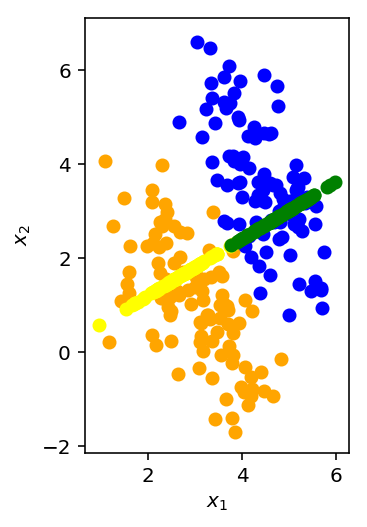

In [6]:
# (d) Compute the projection and plot the figure.
Xproj_0 = w_tilde_star.dot(w_tilde_star.T.dot(X_0)) # Shape: (2, 100).
Xproj_1 = w_tilde_star.dot(w_tilde_star.T.dot(X_1)) # Shape: (2, 100).

print(Xproj_0.shape, Xproj_1.shape)
plt.scatter(X_0[0].tolist(), X_0[1].tolist(), color='orange')
plt.scatter(X_1[0].tolist(), X_1[1].tolist(), color='blue')
plt.scatter(Xproj_0[0].tolist(), Xproj_0[1].tolist(), color='yellow')
plt.scatter(Xproj_1[0].tolist(), Xproj_1[1].tolist(), color='green')
plt.axis('scaled')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [7]:
# (c) Find the optimal w_star and w_tilde_star with unit length.

print(w_star.shape, w_tilde_star.shape)
print('w_star=\n{},\nw_tilde_star=\n{}'.format(w_star, w_tilde_star))

(2, 1) (2, 1)
w_star=
[[-3.46334693]
 [-2.08767026]],
w_tilde_star=
[[-0.85643702]
 [-0.51625152]]


(2, 100) (2, 100)


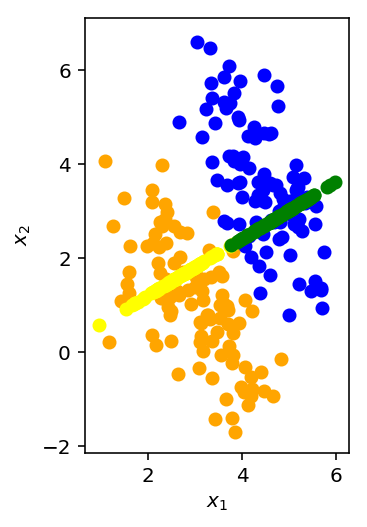

In [8]:
# (d) Compute the projection and plot the figure.

print(Xproj_0.shape, Xproj_1.shape)
plt.scatter(X_0[0].tolist(), X_0[1].tolist(), color='orange')
plt.scatter(X_1[0].tolist(), X_1[1].tolist(), color='blue')
plt.scatter(Xproj_0[0].tolist(), Xproj_0[1].tolist(), color='yellow')
plt.scatter(Xproj_1[0].tolist(), Xproj_1[1].tolist(), color='green')
plt.axis('scaled')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [9]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import GridSearchCV
%config InlineBackend.figure_format = 'retina'

## Q5 Linear SVM

In [10]:
# 1) Load data.

X_and_Y = np.load('./arrhythmia.npy')    # Load data from file.
np.random.shuffle(X_and_Y)               # Shuffle the data.
X = X_and_Y[:,:279]                      # First column to second last column: Features (numerical values) 
Y = X_and_Y[:,279]                       # Last column: Labels (0 or 1)
print(X.shape, Y.shape)                  # Check the shapes.

(452, 279) (452,)


Note: [:, :279] select all 279 features and double check the shape to make sure it is a 279 - dimensional feature vector 

In [11]:
# 2) Split the dataset into 2 parts: 
#    (a) Training set + Validation set  (80% of all data points)
#    (b) Test set                       (20% of all data points)
L = int(0.8 * len(X))
X_train_val = X[:L, :]           # Get features from train + val set.
X_test      = X[L:, :]           # Get features from test set.     
Y_train_val = Y[: L]             # Get labels from train + val set.
Y_test      = Y[L :]             # Get labels from test set.  
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

(361, 279) (91, 279) (361,) (91,)


In [12]:
# 3) Consider linear kernel. Perform grid search for best C 
#    with 3-fold cross-validation. You can use svm.SVC() for SVM
#    classifier and use GridSearchCV() to perform such grid search.
#    For more details, please refer to the sklearn documents:
#         http://scikit-learn.org/stable/modules/svm.html
#         http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

classifier = svm.SVC(kernel = 'linear')
C_list     = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1] # Different C to try.
parameters = {'C': C_list}
clf = GridSearchCV(classifier, parameters, return_train_score = 'true' )
clf.fit(X_train_val, Y_train_val)
print(clf.best_estimator_)

SVC(C=1e-05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


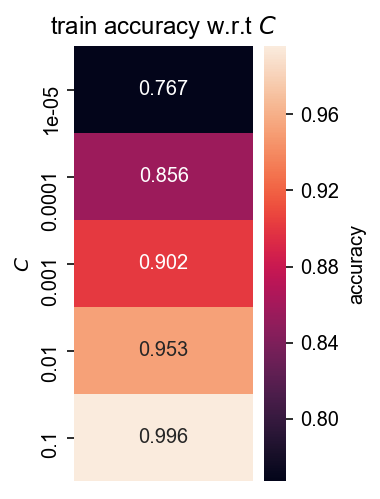

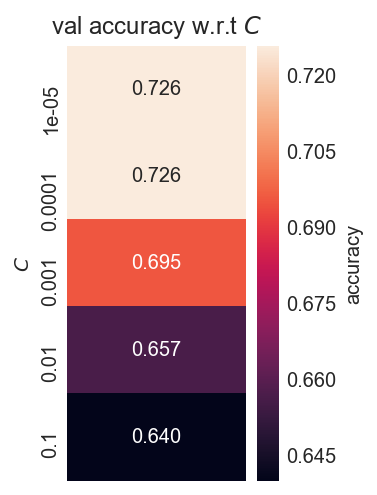

In [13]:
# 4) Draw heatmaps for result of grid search and find 
#    best C for validation set.

def draw_heatmap_linear(acc, acc_desc, C_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()
    
#
# You can use the draw_heatmap_linear() to draw a heatmap to visualize 
# the accuracy w.r.t. C and gamma. Some demo code is given below as hint:
#
# demo_acc        = np.array([[0.8],
#                             [0.7]])
# demo_C_list     = [0.1, 1]
# draw_heatmap_linear(demo_acc, 'demo accuracy', demo_C_list)
#

train_acc = clf.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', C_list)

val_acc = clf.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', C_list)

### Q5.5 - Solution 
[Solution 1] Find the optimal C and train a new SVM using this optimal parameter 

In [14]:
# 5) Use the best C to calculate the test accuracy.
optimal_classifier = svm.SVC(kernel = 'linear', C = clf.best_params_['C'] )
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(test_acc)

0.7802197802197802


[Solution 2] Directly train with the returned optimal SVM model

In [15]:
test_acc = clf.score(X_test, Y_test)
print(test_acc)

0.7802197802197802


[**Incorrect Answer**] It is not correct to train with any classifier designed directly without specify parameter C. It will not use the optimal C.

In [16]:
classifier.fit(X_train_val, Y_train_val)
test_acc = classifier.score(X_test, Y_test)
print(test_acc)
classifier.get_params()

0.6703296703296703


{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# Q6 Implement GridSearchCV

In [17]:
# 1) Implement a simple cross-validation.
def simple_cross_validation(X_train_val, Y_train_val, C, fold):
    """
    A simple cross-validation function.
    We assume the SVM with the RBF kernel.
    
    X_train_val: Features for train and val set. 
                 Shape: (num of data points, num of features)
    Y_train_val: Labels for train and val set.
                 Shape: (num of data points,)
    C:           Parameter C for SVM.
    fold:        The number of folds to do the cross-validation.
    
    Return the average accuracy on validation set.
    """
    val_acc_list = []
    train_acc_list = []
    number = len(Y_train_val)//fold
    for i in range(fold): 
        X_test = X_train_val[i*number:(i+1)*number,:]
        Y_test = Y_train_val[i*number:(i+1)*number]
        X_train = np.delete(X_train_val, slice(i*number,(i+1)*number),axis = 0)
        Y_train = np.delete(Y_train_val, slice(i*number,(i+1)*number),axis = 0)
        newSVM = svm.SVC(kernel = 'linear', C=C)
        newSVM.fit(X_train,Y_train)
        train_acc = newSVM.score(X_train,Y_train)
        val_acc = newSVM.score(X_test,Y_test)
        #__________________
        val_acc_list.append(val_acc)
        train_acc_list.append(train_acc)
        
    return sum(val_acc_list) / len(val_acc_list), \
           sum(train_acc_list) / len(train_acc_list)

In [18]:
# 2) Implement the grid search function. 
def simple_GridSearchCV_fit(X_train_val, Y_train_val, C_list, fold):
    """
    A simple grid search function for C and gamma with cross-validation. 
    We assume the SVM with the RBF kernel.
    
    X_train_val: Features for train and val set. 
                 Shape: (num of data points, num of features)
    Y_train_val: Labels for train and val set.
                 Shape: (num of data points,)
    C_list:      The list of C values to try.
    fold:        The number of folds to do the cross-validation.
    
    Return the val and train accuracy matrix of cross-validation. 
    All combinations of C and gamma are
    included in the matrix. Shape: (len(C_list),1)
    """
    val_acc_matrix   = np.zeros((len(C_list),1))
    train_acc_matrix = np.zeros((len(C_list),1))
    for i in range(len(C_list)):
        val_acc_matrix[i], train_acc_matrix[i]= simple_cross_validation( \
            X_train_val, Y_train_val, C_list[i], fold)
    return val_acc_matrix, train_acc_matrix

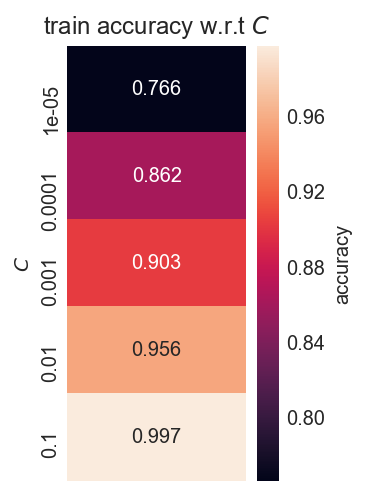

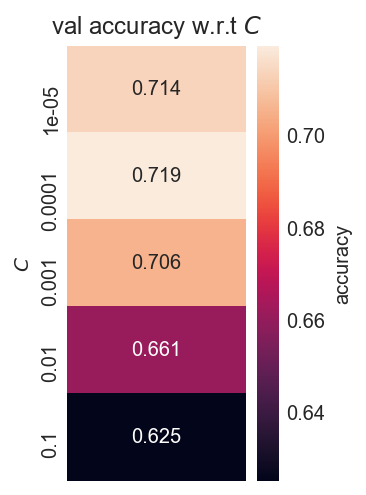

In [19]:
# 3) Perform grid search with 3-fold cross-validation.
#    Draw heatmaps for result of grid search and find 
#    best C and gamma for validation set.
val_acc_matrix, train_acc_matrix = \
    simple_GridSearchCV_fit(X_train_val, Y_train_val, C_list, 3)

draw_heatmap_linear(train_acc_matrix, 'train accuracy', C_list)
draw_heatmap_linear(val_acc_matrix, 'val accuracy',  C_list)